In [41]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

Image:  5488


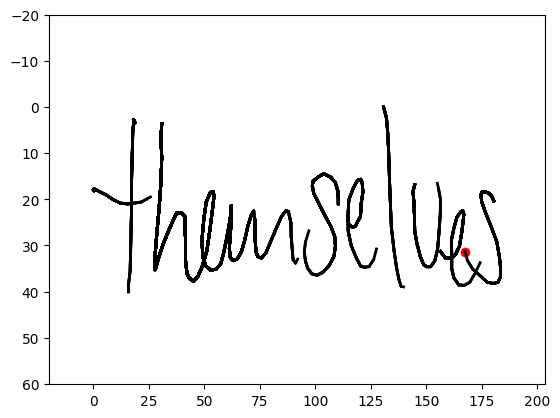

In [35]:
num_files = 43840
img_num = random.randint(1, num_files + 1)
print('Image: ', img_num)

stroke_path = '../../../DataSet/IAM-Online/Resized_Dataset/Train/Strokes/' + f'stroke_{img_num}.npy'
stroke = np.load(stroke_path)

# Create a figure and a line
fig, ax = plt.subplots()

x_min, x_max = np.min(stroke[:, 0]), np.max(stroke[:, 0])
y_min, y_max = np.min(stroke[:, 1]), np.max(stroke[:, 1])

# Set the axis limits
ax.set_xlim(x_min - 20, x_max + 20)
ax.set_ylim(y_min - 20, y_max + 20)

# Invert y-axis
ax.invert_yaxis()

lines = []
start = 0
pen = ax.scatter([], [], color='red')

def animate(i):
    global start
    if stroke[i, 3] == 1 and i != 0:  # start of a new stroke
        start = i
    x = stroke[start:i+1, 0]
    y = stroke[start:i+1, 1]
    line, = ax.plot(x, y, lw=2, color='black')  
    lines.append(line)
    
    pen.set_offsets([stroke[i, 0], stroke[i, 1]])  # move the pen
    return lines + [pen]

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(stroke), interval=20, blit=True)
# save the animation
ani.save('handwriting.gif', writer='pillow', fps=10)

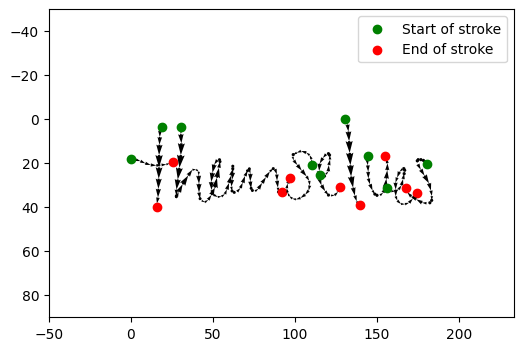

In [40]:
# Create a figure
fig, ax = plt.subplots(figsize=(6, 4))

x_min, x_max = np.min(stroke[:, 0]), np.max(stroke[:, 0])
y_min, y_max = np.min(stroke[:, 1]), np.max(stroke[:, 1])

# Set the axis limits
ax.set_xlim(x_min - 50, x_max + 50)
ax.set_ylim(y_min - 50, y_max + 50)

# Invert y-axis
ax.invert_yaxis()

start = 0
for i in range(len(stroke)):
    if stroke[i, 3] == 1 and i != 0:  # start of a new stroke
        dx = np.diff(stroke[start:i, 0])
        dy = np.diff(stroke[start:i, 1])
        ax.quiver(stroke[start:i-1, 0], stroke[start:i-1, 1], dx, dy, angles='xy', scale_units='xy', scale=1)
        ax.scatter(*stroke[start, :2], color='green')  # start of stroke
        ax.scatter(*stroke[i-1, :2], color='red')  # end of stroke
        start = i
    elif i == len(stroke) - 1:  # end of the last stroke
        dx = np.diff(stroke[start:, 0])
        dy = np.diff(stroke[start:, 1])
        ax.quiver(stroke[start:i, 0], stroke[start:i, 1], dx, dy, angles='xy', scale_units='xy', scale=1)
        ax.scatter(*stroke[start, :2], color='green')  # start of stroke
        ax.scatter(*stroke[i, :2], color='red')  # end of stroke

# Assign labels for the legend
ax.scatter([], [], color='green', label='Start of stroke')
ax.scatter([], [], color='red', label='End of stroke')

# Display the legend
ax.legend()

plt.show()